<h1> Scraping Cardekho.com</h1>

In [1]:
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
import numpy as np

In [2]:
url_cd = "https://www.cardekho.com/maruti/brezza/user-reviews"

In [3]:
# Requesting webscraping using headers

response = requests.get(url_cd,headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'})
print(response.status_code)

200


In [4]:
# Creating soup object 

content = response.text
soup = bs(content,"html")

In [5]:
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><title>Maruti Brezza Reviews - (MUST READ) 555 Brezza User Reviews</title><meta content="Read User Reviews and Ratings of Maruti Brezza. Browse over 555 unbiased Reviews from genuine buyers of Maruti Brezza as well as car experts" name="description"/> <link as="font" crossorigin="anonymous" fetchpriority="low" href="https://stimg.cardekho.com/pwa/fonts/cd-fonts452.woff2?pkq893" rel="preload" type="font/woff2"/> <link crossorigin="anonymous" href="https://staticcont.cardekho.com" rel="preconnect dns-prefetch"/><link crossorigin="anonymous" href="https://stimg.cardekho.com" rel="preconnect dns-prefetch"/><link crossorigin="anonymous" href="https://connect.facebook.net" rel="preconnect dns-prefetch"/><link crossorigin="anonymous" href="https://www.googletagmanager.com" rel="preconnect dns-prefetch"/><link crossorigin="anonymous" href="https://securepubads.g.doubleclick.net" rel="preconnect dns-prefetch"/><link crossorigin="anony

In [6]:
review_box = soup.find_all('div',class_='readReviewBox')

In [7]:
# For Rating
ratings=[]
ratings_data=[]
ratings_class_text=[]

# For Title,Review and Author
titles=[]
review_cds=[]
author_names=[]
review_dates=[]

In [8]:
# Function to get reviews from Car Dekho

def get_review_cd(url):
    for review in review_box:
        star_rating = review.find('div', class_='starRating')
        ratings_class_text = []
        for span in star_rating.find_all('span'):
            class_value = span.attrs.get('class', [])
            ratings_class_text.append(class_value)
        ratings_data.append(ratings_class_text)

        title = review.find("h3").get_text()
        review_cd = review.find("p", class_="contentheight").get_text()    
        author_name = review.find("div",class_='name').get_text()[3:]    
        review_date = review.find("div",class_='date').get_text()[4:16]

        titles.append(title)
        review_cds.append(review_cd)
        author_names.append(author_name)
        review_dates.append(review_date)    

In [9]:
# Reviews for first page

get_review_cd(url_cd)

In [10]:
# Creating a list containing all page numbers

pages = []
for x in range (2,20):
    pages.append(x)

In [11]:
# Extracting remaining pages

for page in pages:    
    web_cd = f'https://www.cardekho.com/maruti/brezza/user-reviews/{page}?subtab=latest'
    response = requests.get(web_cd,headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'})
    soup = bs(response.text,"html")
    review_box = soup.find_all('div',class_='readReviewBox')
    get_review_cd(web_cd)

In [12]:
for i in range(0,int(len(ratings_data))):
    ratings_data[i].remove([])

In [13]:
# Star_rating function

def star_rating_cd(ratings_data):
    for star in ratings_data:
        n = 0
        for i in range(0,5):
            if star[i][2] == 'icon-star-full-fill':
                n = n+1
            if star[i][2] == 'icon-star-half-empty':
                n = n+0.5
        ratings.append(n)

In [14]:
star_rating_cd(ratings_data)

In [15]:
ratings

[4.5,
 5,
 4,
 3.5,
 3.5,
 4.5,
 4,
 3.5,
 4.5,
 3.5,
 4.5,
 5,
 4,
 4.5,
 4,
 4.5,
 3.5,
 4.5,
 4.5,
 5,
 4.5,
 4.5,
 5,
 3.5,
 4.5,
 5,
 5,
 4.5,
 5,
 4.5,
 5,
 4.5,
 3.5,
 5,
 4.5,
 5,
 4.5,
 4.5,
 5,
 4.5,
 5,
 3.5,
 4.5,
 4.5,
 5,
 4.5,
 5,
 5,
 4,
 5,
 4,
 4.5,
 4.5,
 1.5,
 4.5,
 4.5,
 4.5,
 5,
 5,
 4,
 4.5,
 5,
 4,
 5,
 5,
 4.5,
 4.5,
 4.5,
 4,
 4.5,
 4.5,
 3,
 4,
 4.5,
 3,
 4,
 4,
 5,
 4.5,
 4.5,
 4.5,
 4,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4,
 3.5,
 4,
 5,
 3.5,
 3.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4,
 4.5,
 3.5,
 4,
 4.5,
 4,
 5,
 4,
 4.5,
 5,
 4,
 5,
 4.5,
 4.5,
 3.5,
 5,
 4,
 4,
 4.5,
 4.5,
 3.5,
 5,
 4.5,
 3.5,
 4.5,
 3.5,
 4,
 4.5,
 5,
 4.5,
 5,
 4.5,
 3.5,
 5,
 3.5,
 4.5,
 4,
 3,
 1.5,
 4.5,
 4.5,
 4,
 4.5,
 5,
 5,
 4.5,
 4.5,
 4.5,
 5,
 4,
 4.5,
 4.5,
 4.5,
 4,
 2.5,
 5,
 5,
 5,
 4.5,
 5,
 4.5,
 3.5,
 4.5,
 4.5,
 4.5,
 5,
 3.5,
 4,
 5,
 4,
 5,
 4.5,
 3.5,
 5,
 4.5,
 4.5,
 4,
 5,
 5,
 4.5,
 4.5,
 4.5,
 4,
 4.5,
 4.5,
 4.5,
 5,
 5,
 3.5,
 5,
 4.5,
 3.5,
 5,
 5,
 3.5,
 4.5,
 4

In [16]:
reviews_car_dekho = {'Title': titles,'Review': review_cds,'Rating': ratings,'Author':author_names,'Date Posted':review_dates}

In [17]:
df_car_dekho =pd.DataFrame(reviews_car_dekho)

In [18]:
df_car_dekho[df_car_dekho.duplicated()]

,Title,Review,Rating,Author,Date Posted


In [19]:
df_car_dekho.drop_duplicates(inplace = True)

In [20]:
df_car_dekho

,Title,Review,Rating,Author,Date Posted
0,Best Car,Boasting a high-quality engine that delivers o...,4.5,khan,"Mar 23, 2024"
1,Low Maintenance costs,"The best SUV in its segment, offers great valu...",5.0,sourabh,"Mar 21, 2024"
2,"Maruti Brezza SUV Offering A Blend Of Style, P...",I have endured nobody but great driving gests ...,4.0,ann,"Mar 21, 2024"
3,Useable Features,The new Brezza look amazing and the design is ...,3.5,priti,"Mar 18, 2024"
4,Maruti Brezza Compact SUV,"The Maruti Brezza, a compact SUV built for adv...",3.5,kavita,"Mar 15, 2024"
...,...,...,...,...,...
550,The Car I Drive,The car I drive is very powerful but less with...,4.5,renu chauhan,"Apr 18, 2022"
551,Best Car In SUV Segment,"Best car in SUV segment, good looking interior...",5.0,bhupender singh,"Apr 17, 2022"
552,Awesome Car,This car has many safety features with the bes...,4.5,terrific gaming,"Apr 15, 2022"
553,Best SUV,Maruti Vitara Breeza is the best SUV I used it...,5.0,arjun tukaram kodag,"Mar 17, 2022"


<h1>Scraping CarWale.com </h1>

In [21]:
url_cw = "https://www.carwale.com/maruti-suzuki-cars/brezza/"

In [22]:
# Requesting webscraping using headers

response = requests.get(url_cw,headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'})
print(response.status_code)

200


In [23]:
# Creating soup object 

content = response.text
soup = bs(content,"html")

In [24]:
review_box = soup.find_all('div',class_='o-fznJPk')

In [25]:
# For Title,Review and Author
titles_cw=[]
review_cws=[]
author_names_cw=[]
review_dates_cw=[]

In [26]:
# Function to get reviews from Car Dekho

def get_review_cw(url):
    
    for review in review_box:
        title = review.find('div',class_="o-cHCHQJ o-dsiSgT o-fzpilz hsXy7t o-cpnuEd")
        if title == None:
            continue
        else:
            title = title.get_text()
        titles_cw.append(title)
            
            
        review_cw = review.find("div", class_="o-eZTujG o-bkmzIL o-fyWCgU undefined")
        if review_cw == None:
            continue
        else:
            review_cw = review_cw.get_text() 
        review_cws.append(review_cw)

In [27]:
page_cw=[]
for i in range(1,21):
    page_cw.append(i)

In [28]:
# Extracting all reviews

for page in page_cw:    
    web_cw = f'https://www.carwale.com/maruti-suzuki-cars/brezza/user-reviews-p{page}/'
    response = requests.get(web_cw,headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'})
    soup = bs(response.text,"html")
    review_box = soup.find_all('div',class_='o-fznJPk')
    get_review_cw(web_cw)

In [29]:
reviews_car_wale = {'Title': titles_cw,'Review': review_cws}

In [30]:
df_car_wale =pd.DataFrame(reviews_car_wale)

In [31]:
df_car_wale

,Title,Review
0,Value for money car,"Value for money SUV. Easy to drive, very smoot..."
1,Amazing looks and First time driving experience,Just an eye-catching n fabulous back look Bree...
2,Nice car,Very good conditions best car good performance...
3,Amazing car such a great experience,Very easy to buy this car and amazing experien...
4,Maruti Suzuki Brezza Review,1. Value for Money.\n2. Smooth drive for daily...
...,...,...
187,Brezza the king from long,The Maruti is one of the best is buying.\nThe ...
188,Great Brezza,It's very nice and comfortable\nBrezza was suc...
189,Amazing,Awesome looks amazing performance looking so b...
190,Safe Economy & Comfort,"Good average, great drive total value for mone..."


<h1>Scraping CarTrade.com </h1>

In [32]:
url_ct = "https://www.cartrade.com/maruti-suzuki-cars/brezza/reviews/brezza-user-reviews/"

In [33]:
response = requests.get(url_ct)
print(response.status_code)

200


In [34]:
# Creating soup object 

content = response.text
soup = bs(content,"html")

In [35]:
review_box = soup.find_all('div',class_='user-review__content')

In [36]:
# For Title,Review and Author
titles_ct=[]
review_cts=[]
author_names_ct=[]
review_dates_ct=[]
ratings_ct=[]

In [37]:
# Function to get reviews from Car Dekho

def get_review_ct(url):
    for review in review_box:


        title = review.find('div',class_="user-review__title-container").get_text()
        
        rating = review.find('span',class_="rating-badge").get_text()
        
        review_ct = review.find('div',class_="user-review__description").get_text()
         
        author_name =  review.find('p',class_="user-review__author-days").get_text()[14:]
                       
        review_date =  review.find('p',class_="user-review__author-days").get_text()[:12]


        titles_ct.append(title)
        ratings_ct.append(rating)
        review_cts.append(review_ct)
        author_names_ct.append(author_name)
        review_dates_ct.append(review_date) 

In [38]:
get_review_ct(url_ct)

In [39]:
reviews_car_trade = {'Title': titles_ct,'Review': review_cts,'Rating': ratings_ct,'Author':author_names_ct,'Date Posted':review_dates_ct}

In [40]:
df_car_trade = pd.DataFrame(reviews_car_trade)

In [41]:
df_car_trade #Fix Rajesh

,Title,Review,Rating,Author,Date Posted
0,5Brezza,It is a five seater car with good features. Th...,5,Sudhir,1 month ago
1,5Amazing,Impressive performance performance with punch ...,5,Manish,2 months ago
2,5Nice 👍 suv,Very wonderful suv I like to drive it onroadin...,5,Anil Kumar Yadav,3 months ago
3,3Easy buy,Buying a maruti is always easy be it the price...,3,Swapnil,5 months ago
4,4Nice car with better specifications,Buying experience was bet good but showroom ex...,4,Shreyas,5 months ago
5,5Seating and driving is very comfortable,"I have Brezza ZXI+MT 2020 model,It is very com...",5,Sathish Rao ambeeri,5 months ago
6,3Light is very poor low mileage,Head light is very poor night driveing is very...,3,CHANDRAREDDY BONGU,6 months ago
7,4Brezza,Overall vehicle is so good to its price..inter...,4,Shamanth,6 months ago
8,4Best in segment,Best car under 13 lakhs.\nEngine is the best c...,4,Abdul jabir,6 months ago
9,5Luxury and feul afecincy in Budget,"Thanks maruti , this car is dream car in budge...",5,ajesh Agarwal,1 year ago |


In [42]:
df_brezza_reviews = pd.concat([df_car_dekho,df_car_wale,df_car_trade],ignore_index=True)

In [43]:
df_brezza_reviews

,Title,Review,Rating,Author,Date Posted
0,Best Car,Boasting a high-quality engine that delivers o...,4.5,khan,"Mar 23, 2024"
1,Low Maintenance costs,"The best SUV in its segment, offers great valu...",5.0,sourabh,"Mar 21, 2024"
2,"Maruti Brezza SUV Offering A Blend Of Style, P...",I have endured nobody but great driving gests ...,4.0,ann,"Mar 21, 2024"
3,Useable Features,The new Brezza look amazing and the design is ...,3.5,priti,"Mar 18, 2024"
4,Maruti Brezza Compact SUV,"The Maruti Brezza, a compact SUV built for adv...",3.5,kavita,"Mar 15, 2024"
...,...,...,...,...,...
752,5Seating and driving is very comfortable,"I have Brezza ZXI+MT 2020 model,It is very com...",5,Sathish Rao ambeeri,5 months ago
753,3Light is very poor low mileage,Head light is very poor night driveing is very...,3,CHANDRAREDDY BONGU,6 months ago
754,4Brezza,Overall vehicle is so good to its price..inter...,4,Shamanth,6 months ago
755,4Best in segment,Best car under 13 lakhs.\nEngine is the best c...,4,Abdul jabir,6 months ago


In [44]:
df_brezza_reviews.to_csv('Maruti Brezza Reviews.csv', index = False)

In [45]:
df =pd.read_csv('Maruti Brezza Reviews.csv')

In [46]:
reviews = df['Review'].to_list()

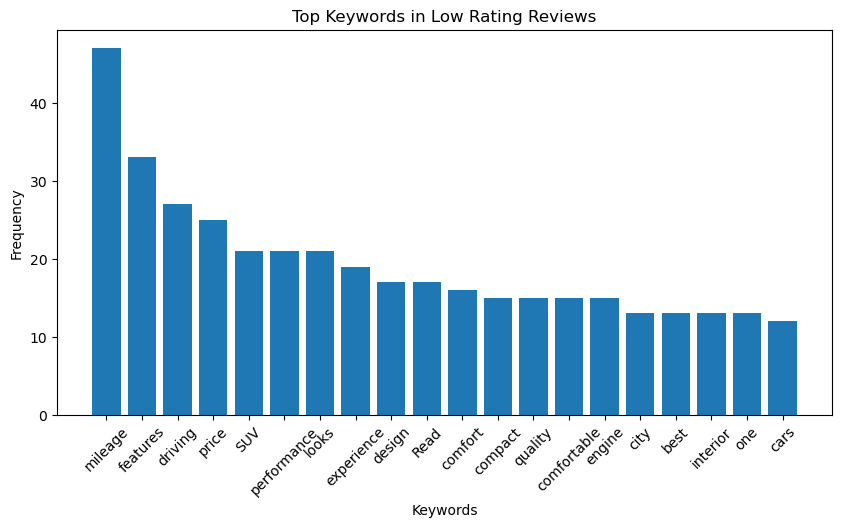

In [47]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string
import nltk
import matplotlib.pyplot as plt


low_rating_reviews = df[df['Rating'] <= 3.5]['Review']


text = ' '.join(low_rating_reviews)


text = text.translate(str.maketrans('', '', string.punctuation))


tokens = word_tokenize(text)


stop_words = set(stopwords.words('english'))


additional_stop_words = {'car', 'maruti', 'brezza','good','better','also','new','like','Read'}


filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.lower() != 's' and word.lower() not in additional_stop_words]


word_freq = Counter(filtered_tokens)


top_keywords = word_freq.most_common(20)

# Visualize the top keywords
keywords, frequencies = zip(*top_keywords)
plt.figure(figsize=(10, 5))
plt.bar(keywords, frequencies)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Top Keywords in Low Rating Reviews')
plt.xticks(rotation=45)
plt.show()


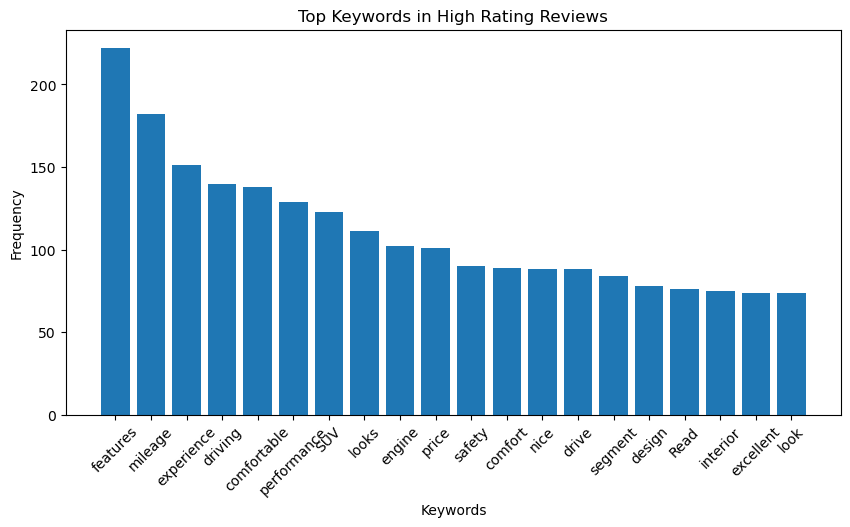

In [48]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string
import nltk
import matplotlib.pyplot as plt


low_rating_reviews = df[df['Rating'] > 3.5]['Review']


text = ' '.join(low_rating_reviews)


text = text.translate(str.maketrans('', '', string.punctuation))


tokens = word_tokenize(text)


stop_words = set(stopwords.words('english'))

additional_stop_words = {'car', 'maruti', 'brezza','good','best','also','great','like'}


filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word.lower() != 's' and word.lower() not in additional_stop_words]

word_freq = Counter(filtered_tokens)


top_keywords = word_freq.most_common(20)

# Visualize the top keywords
keywords, frequencies = zip(*top_keywords)
plt.figure(figsize=(10, 5))
plt.bar(keywords, frequencies)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Top Keywords in High Rating Reviews')
plt.xticks(rotation=45)
plt.show()


In [49]:
aspects = ['mileage', 'looks', 'performance', 'comfortable', 'features', 'price']

aspect_ratings = {}


for aspect in aspects:
    aspect_ratings[aspect] = df[df['Review'].str.lower().str.contains(aspect)]['Rating'].mean().round(2)

for aspect, rating in aspect_ratings.items():
    print(f'{str.upper(aspect)} \n Average Rating: {rating} \n')


MILEAGE 
 Average Rating: 4.34 

LOOKS 
 Average Rating: 4.35 

PERFORMANCE 
 Average Rating: 4.45 

COMFORTABLE 
 Average Rating: 4.51 

FEATURES 
 Average Rating: 4.38 

PRICE 
 Average Rating: 4.24 

